# DESCRIPTIVE ANALYSIS (ANÁLISIS DESCRIPTIVO)

El objetivo de esta sección es analizar de la distribución de las variables cómo se relacionan las mismas.

<br>

Se encarga de responder preguntas como:
- ¿Cuál es el valor más frecuente?
- ¿Cómo es la distribución de los datos (normal, tirada a la derecha/izquierda, etc)?
- ¿Cómo se relacionan las variables?

<br>

---

## Configuración General

1. Carga de librerías.
2. Seteo de estilos del notebook.
3. Ingesta del dataset.

In [2]:
import sys
import os
import statistics

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from scipy import stats



sys.path.append(os.path.abspath(os.path.join('..', '..', 'src', 'utils')))
import utils as ut

In [3]:
# Seteo de estilos
plt.style.use("ggplot")
sns.set_palette("viridis")
plt.rcParams["figure.figsize"] = (9,6)

In [4]:
wines = pd.read_csv("../../src/data/transformed/wines_clean.csv")
pd.set_option('display.max_columns', None)
print(wines.shape)
wines.head(3)

(1955, 118)


,wine_link,name,year,winery,rating,rating_qty,price,body,tannis,sweetness,acidity,style,alcohol,image,ageing,black fruit,citrus,dried fruit,earthy,floral,oaky,red fruit,spices,tree fruit,tropical,vegetal,yeasty,any junk food will do,aperitif,appetizers and snacks,beef,blue cheese,cured meat,"game (deer, venison)",goat's milk cheese,lamb,lean fish,mature and hard cheese,mild and soft cheese,mushrooms,pasta,pork,poultry,"rich fish (salmon, tuna etc)",shellfish,spicy food,veal,vegetarian,Albariño,Barbera,Bonarda,Béquignol Noir,Cabernet Franc,Cabernet Sauvignon,Cereza,Chardonnay,Chenin Blanc,Criolla Grande,Garnacha,Gewürztraminer,Grenache,Grüner Veltliner,Malbec,Malvasia,Marsanne,Mencia,Merlot,Moscatel,Mourvedre,Pais,Pedro Ximenez,Petit Verdot,Pinot Gris,Pinot Noir,Riesling,Roussanne,Sangiovese,Sauvignon Blanc,Shiraz/Syrah,Sémillon,Tannat,Tempranillo,Torrontés,Trousseau,Verdejo,Viognier,Agrelo,Argentina,Brazil,Cafayate Valley,Calchaqui Valley,Campanha,Famatina,Gualtallary,La Consulta,La Rioja,Las Compuertas,Lujan de Cuyo,Lunlunta,Maipu,Mendoza,Paraje Altamira,Patagonia,Pedernal Valley,Perdriel,Rio Grande do Sul,Rio Negro,Salta,San Carlos,San Juan,San Rafael,Serra Gaúcha,Tulum Valley,Tunuyán,Tupungato,Uco Valley,Vale dos Vinhedos,Vista Flores
0,https://www.vivino.com/US/en/luigi-bosca-parai...,Paraiso,2020.0,Luigi Bosca,4.8,582.0,188.33,0.7343,0.5090,0.1361,0.4474,Argentinian Cabernet Sauvignon - Malbec,0.1410,https://images.vivino.com/thumbs/_Bf6JTwYRpSX6...,0.0000,0.3500,0.000,0.000,0.1250,0.0500,0.3250,0.0500,0.1000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2015.0,Catena Zapata,4.7,297.0,675.00,0.7417,0.5583,0.1434,0.5445,Argentinian Bordeaux Blend,0.1400,https://images.vivino.com/thumbs/Yt464jw0QS-ug...,0.0241,0.2008,0.008,0.012,0.0964,0.0241,0.4378,0.0843,0.1004,0.0,0.0,0.004,0.008,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2017.0,Catena Zapata,4.7,219.0,580.00,0.7417,0.5583,0.1434,0.5445,Argentinian Bordeaux Blend,0.1416,https://images.vivino.com/thumbs/Yt464jw0QS-ug...,0.0241,0.2008,0.008,0.012,0.0964,0.0241,0.4378,0.0843,0.1004,0.0,0.0,0.004,0.008,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<br>
<br>
<br>
<br>
<br>
<br>

---

## 01 | Análisis de Datos Numéricos

Esta sección se enfoca en analizar la frecuencia y distribución de variables numéricas para comprender valores habituales y atípicos, densidad de valores y estadísticas descriptivas generales.

### Rating
- ¿Cuales son los ratings más comunes?
- ¿El rating se relaciona con la cantidad de ratings?
- ¿El rating es un buen parámetro para la recomendación de vinos?
- ¿La cantidad de ratings se relaciona con un buen rating?
<br>
<br>
> Rating: los valores más frecuentes están entre *3.9 y 4.1* aproximadamente, con una distribución más o menos normal.

> Rating Quantity: la distribución está tirada hacia la izquierda, con algunos outliers muy alejados en el extremo derecho. En general, los valores más frecuentes son hasta *160-170* ratings aproximadamente, con muchos valores siendo el mínimo (25).
<br>
---

In [5]:
# Métricas generales del rating y rating quantity
wines[["rating", "rating_qty"]].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,1955.0,4.014322,0.281463,2.9,3.9,4.0,4.2,4.8
rating_qty,1955.0,599.584655,1183.189564,25.0,38.0,178.0,587.0,18091.0


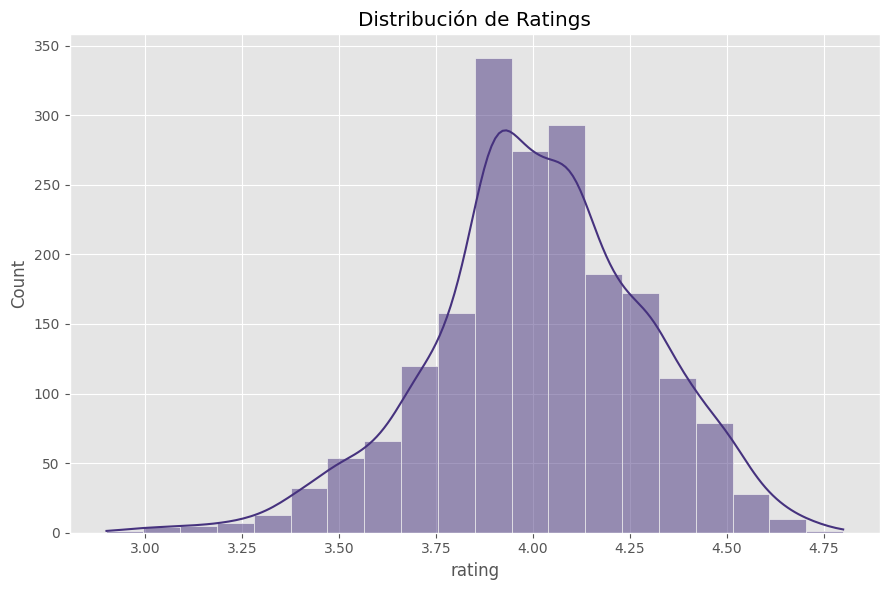

In [6]:
# Distribución del rating
sns.histplot(wines['rating'], bins=20, kde=True)
plt.title('Distribución de Ratings')

plt.tight_layout()
plt.show()

<Axes: xlabel='rating', ylabel='Count'>

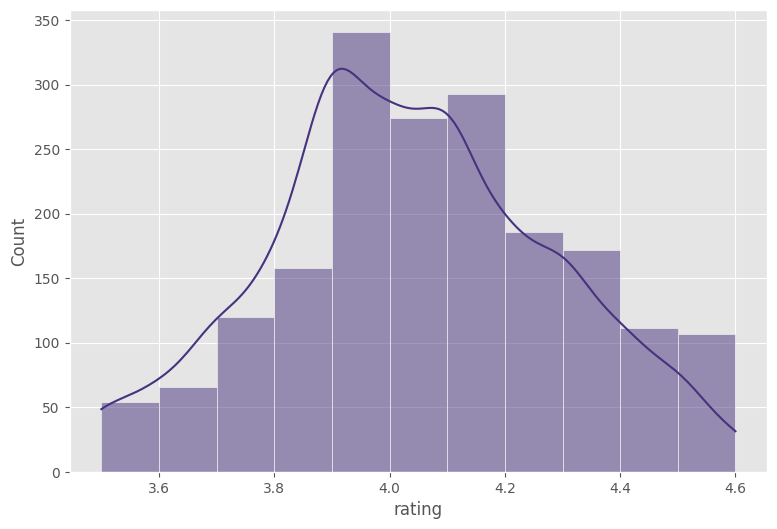

In [7]:
# Distribución del rating eliminando outliers
no_outlier_rating = ut.manage_outlier_IQR(df=wines["rating"], func="remove")
sns.histplot(no_outlier_rating, binwidth=0.1, kde=True)

<Axes: xlabel='rating_qty', ylabel='Count'>

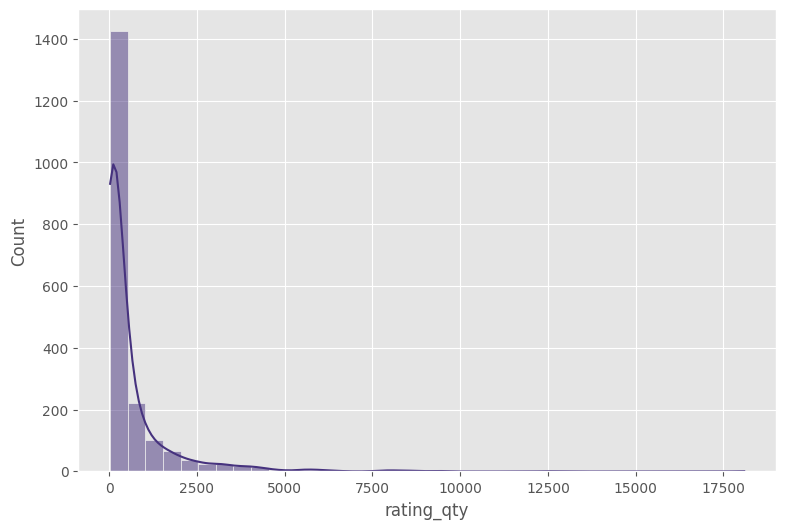

In [8]:
# Distribución de la cantidad de ratings
sns.histplot(wines, x="rating_qty", binwidth=500, kde=True)

<Axes: xlabel='rating_qty', ylabel='Count'>

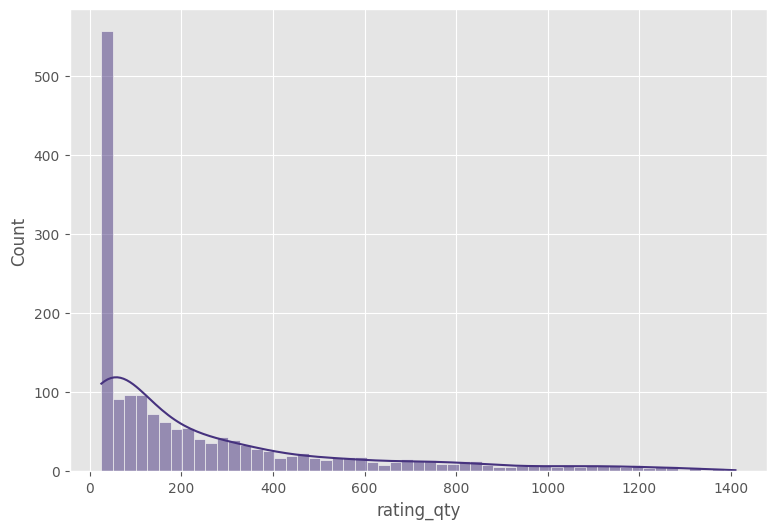

In [9]:
# Distribución de la cantidad de ratings sin outliers
no_outlier_rating_qty = ut.manage_outlier_IQR(df=wines["rating_qty"], func="remove")
sns.histplot(no_outlier_rating_qty, kde=True, binwidth=25)

### Price

- ¿Qué sería un vino caro y uno barato?
- ¿Nuestro dataset contiene muchos vinos caros o más baratos?
- ¿Pordían haber subcategorías dentro de cada categoría de precio?
- ¿Cual es la distribución del precio-calidad de nuestros vinos?
<br>
<br>

> Hay 4 categorías que creamos de vinos: baratos (hasta 18USD), medio (hasta 24USD), medio caro (hasta 35USD), caros (+35USD).


> Tenemos sobre todo vinos caros.

> Tenemos algo más de densidad de vinos por debajo de la moda de precio-calidad que por encima, si buscamos gangas.

> Tenemos más cantidad de vinos con relación precio-calidad positiva que negativa, si buscamos calidad máxima.

---

In [10]:
# Estadísticas descriptivas del precio
pd.DataFrame(wines["price"]).describe().T

,count,mean,std,min,25%,50%,75%,max
price,1955.0,45.335908,63.392325,6.55,18.995,25.0,44.85,1438.99


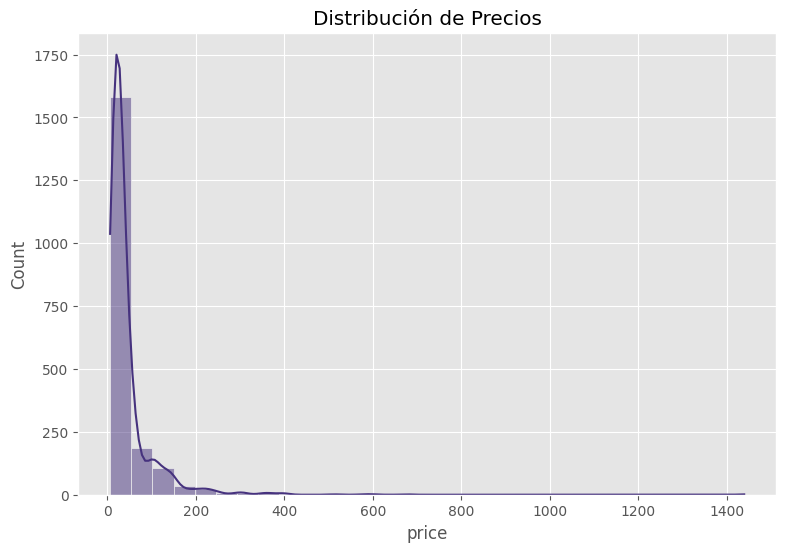

In [11]:
# Distribución de precios
sns.histplot(wines['price'], bins=30, kde=True)
plt.title('Distribución de Precios')
plt.show()

<Axes: xlabel='price', ylabel='Count'>

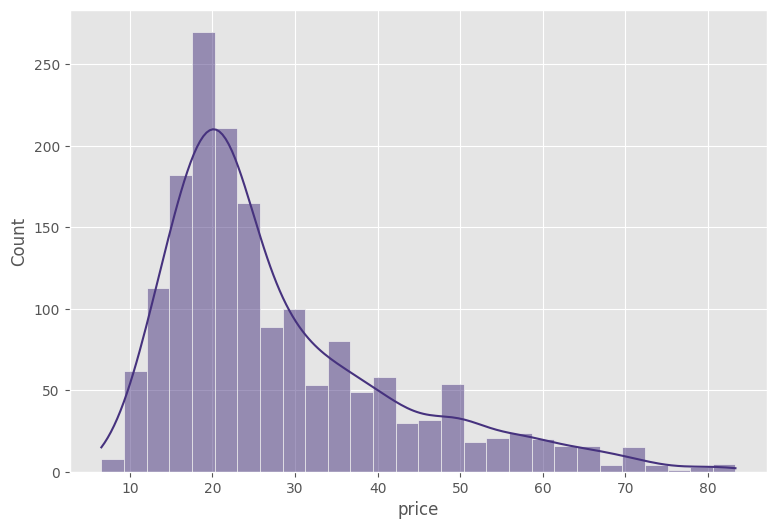

In [12]:
# Distribución del precio sin outliers
no_outlier_price = ut.manage_outlier_IQR(df=wines["price"], func="remove")
sns.histplot(no_outlier_price, kde=True)

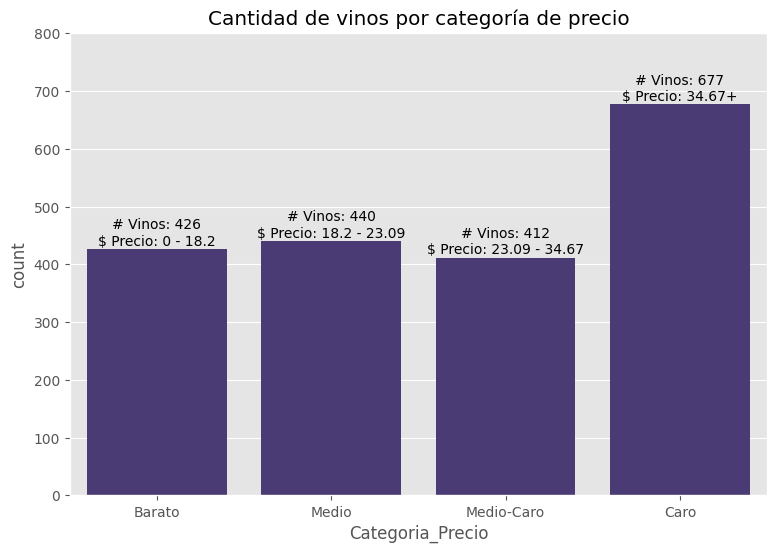

In [13]:
# Categorización de vinos en base al precio, según el cuartil de precios sin outliers
cheap_threshold = no_outlier_price.quantile(0.25)
mid_threshold = no_outlier_price.quantile(0.5)
expensive_threshold = no_outlier_price.quantile(0.75)

def categorizar_precio(p, cheap, mid, exp):
    if p <= cheap_threshold:
        return "Barato"
    elif ((p > cheap) & (p <= mid)):
        return "Medio"
    elif ((p > mid) & (p <= exp)):
        return "Medio-Caro"
    elif p > exp:
        return "Caro"
    else:
        return "Desconocido"

wines['Categoria_Precio'] = wines['price'].apply(
    lambda p: categorizar_precio(p, cheap_threshold, mid_threshold, expensive_threshold)
)

categorias_precio = ['Barato', 'Medio', 'Medio-Caro', 'Caro']

categories_map = {
    "Barato": f"0 - {round(cheap_threshold,2)}",
    "Medio": f"{round(cheap_threshold,2)} - {round(mid_threshold,2)}",
    "Medio-Caro": f"{round(mid_threshold,2)} - {round(expensive_threshold,2)}",
    "Caro": f"{round(expensive_threshold,2)}+"
}

ax = sns.countplot(
    data=wines,
    x='Categoria_Precio',
    order=categorias_precio,
)

ax.set_ylim(0, 800)

for p, categoria in zip(ax.patches, categorias_precio):
    height = p.get_height()
    price_range = categories_map[categoria]

    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 2, 
        f'# Vinos: {int(height)}\n$ Precio: {price_range}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Cantidad de vinos por categoría de precio")
plt.show()

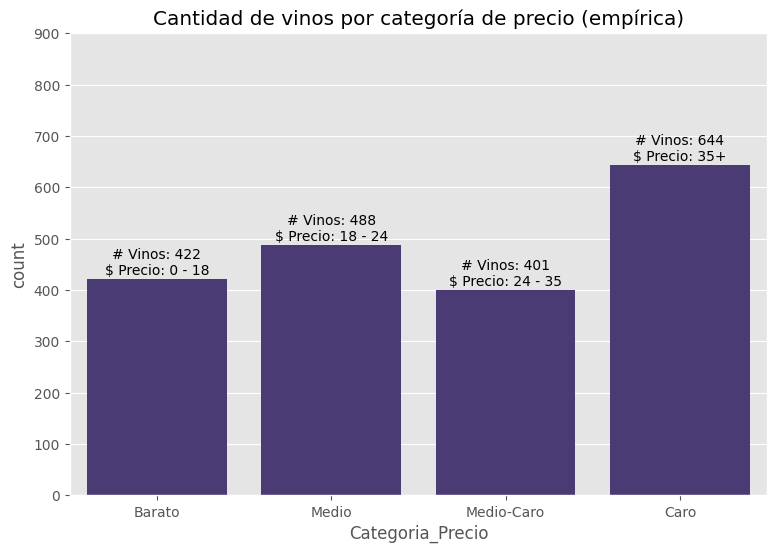

In [14]:
# Categorización de vinos según thresholds redondeados, cercanos a cuartiles de outliers (empírica)
cheap_threshold = 18
mid_threshold = 24
expensive_threshold = 35

wines['Categoria_Precio'] = wines['price'].apply(
    lambda p: categorizar_precio(p, cheap_threshold, mid_threshold, expensive_threshold)
)

categorias_precio = ['Barato', 'Medio', 'Medio-Caro', 'Caro']

categories_map = {
    "Barato": f"0 - {round(cheap_threshold,2)}",
    "Medio": f"{round(cheap_threshold,2)} - {round(mid_threshold,2)}",
    "Medio-Caro": f"{round(mid_threshold,2)} - {round(expensive_threshold,2)}",
    "Caro": f"{round(expensive_threshold,2)}+"
}

ax = sns.countplot(
    data=wines,
    x='Categoria_Precio',
    order=categorias_precio,
)

ax.set_ylim(0, 900)

for p, categoria in zip(ax.patches, categorias_precio):
    height = p.get_height()
    price_range = categories_map[categoria]

    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 2, 
        f'# Vinos: {int(height)}\n$ Precio: {price_range}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Cantidad de vinos por categoría de precio (empírica)")
plt.show()

*relación precio calidad*

https://claude.ai/share/f8e92a49-305a-4124-9918-bd89cbcaa1ce

**Método 1: Rating/log(precio)**

Pros:

- Más simple y directo conceptualmente
- No depende del resto de la población (cada vino tiene su valor independiente)
- El logaritmo reduce el impacto de precios muy altos
- Favorece claramente vinos de bajo precio con ratings decentes
- Fórmula constante que no cambia si se agregan más datos

Contras:

- Penaliza desproporcionadamente vinos de mayor precio
- Puede crear distorsiones en el extremo inferior de precios
- La escala logarítmica podría no ser intuitiva para usuarios finales
- No considera la distribución estadística de los datos

Rating/log(precio): Este método favorecerá casi siempre vinos de precio muy bajo con ratings aceptables, porque el denominador (log del precio) será muy pequeño para precios bajos. Por ejemplo, log(10) = 2.3 mientras que log(100) = 4.6, así que un vino 10 veces más caro solo tiene un denominador 2 veces mayor.

      rating  price  calidad_precio_log
1566     4.1   7.99            1.866935
955      3.6   6.55            1.780814
1419     4.2  11.99            1.637951
1048     3.4   6.99            1.636038
1872     3.9   9.99            1.627043
507      3.9   9.99            1.627043
1772     3.9   9.99            1.627043
1864     3.9   9.99            1.627043
1593     4.1  11.99            1.598952
365      4.1  11.99            1.598952
1570     4.1  11.99            1.598952
1858     3.9  10.50            1.596825
1815     3.9  10.99            1.570002
1842     3.9  10.99            1.570002
1953     3.9  10.99            1.570002
539      3.9  10.99            1.570002
1831     3.9  10.99            1.570002
1833     3.9  10.99            1.570002
1940     3.9  10.99            1.570002
1721     4.0  11.95            1.561831


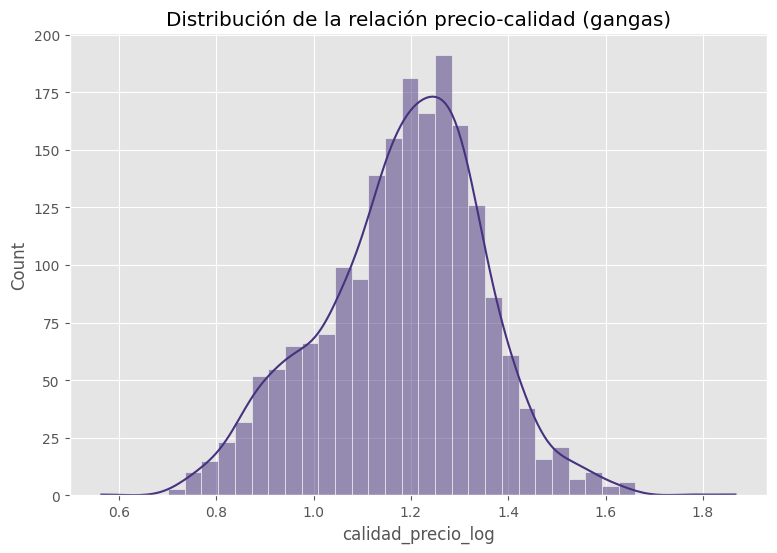

In [15]:
wines['log_price'] = np.log1p(wines['price'])
wines['calidad_precio_log'] = wines['rating'] / wines['log_price']
print(wines[["rating", "price", "calidad_precio_log"]].sort_values(by='calidad_precio_log', ascending=False).head(20))
sns.histplot(wines['calidad_precio_log'], kde=True)
plt.title("Distribución de la relación precio-calidad (gangas)")
plt.show()

**Método 1: Z-score modificado (Rating_zscore - Price_zscore)**

Pros:

- Considera la distribución estadística completa de precios y ratings
- Normaliza ambas variables para hacerlas comparables
- Es robusto ante valores extremos (outliers)
- Fácil interpretación: valores positivos indican buena relación calidad-precio
- Puede identificar vinos de cualquier rango de precio que ofrezcan valor excepcional dentro de su categoría

Contras:

- Depende de la población completa de datos (cambiar el dataset alteraría todos los índices)
- Menos intuitivo para personas sin conocimiento estadístico
- No tiene un límite fijo (puede variar dependiendo de los datos)
- Favorece vinos con un buen balance entre precio y calidad, no necesariamente los más baratos con rating decente

Z-score modificado: Este método favorece vinos que están "mejor posicionados en calidad que en precio" dentro de la distribución general. Pueden ser vinos de precio medio con excelente rating o incluso vinos caros pero con rating excepcionalmente alto para su categoría de precio.

      rating  price  zscore_quality_price
1132     4.5  29.24              1.979961
11       4.6  66.67              1.744737
16       4.6  66.67              1.744737
1105     4.6  66.67              1.744737
1119     4.5  44.85              1.733654
1123     4.5  44.85              1.733654
1187     4.4  24.14              1.705056
1159     4.4  25.00              1.691487
30       4.5  49.01              1.668014
1129     4.5  49.99              1.652551
1154     4.5  56.99              1.542099
67       4.4  34.76              1.537485
1171     4.4  36.50              1.510030
99       4.4  38.84              1.473108
77       4.4  38.84              1.473108
1203     4.4  39.87              1.456856
1296     4.3  18.91              1.432203
1259     4.3  19.99              1.415161
1208     4.4  42.92              1.408730
1239     4.3  20.68              1.404274

Negative zscore_quality_price count: 832
Positive zscore_quality_price count: 1123



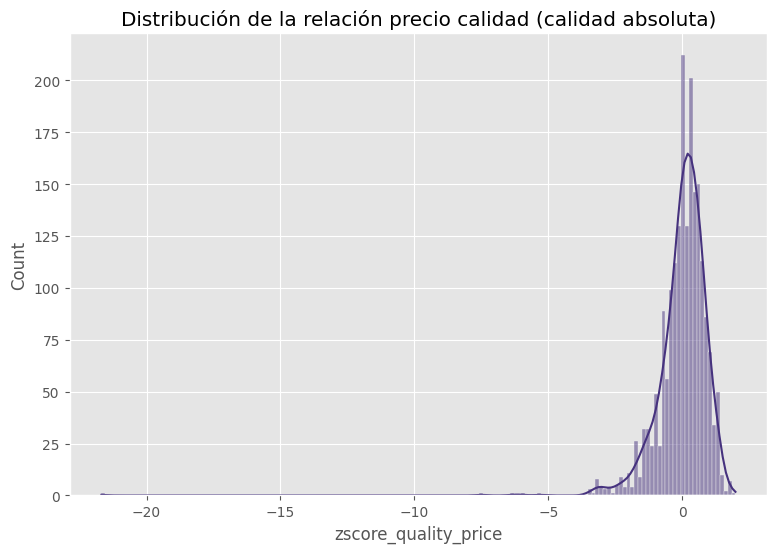

In [16]:
# El Z-score (o puntuación estándar) es una medida estadística que indica cuántas desviaciones estándar
# un valor está por encima o por debajo de la media de la población o muestra. Es una forma de estandarizar
# datos que tienen diferentes unidades o escalas.

wines['rating_zscore'] = stats.zscore(wines["rating"])
wines['price_zscore'] = stats.zscore(wines["price"])
wines["zscore_quality_price"] = wines['rating_zscore'] - wines['price_zscore']
print(wines[["rating", "price", "zscore_quality_price"]].sort_values(by="zscore_quality_price", ascending=False).head(20))
negative_count = (wines['zscore_quality_price'] < 0).sum()
positive_count = (wines['zscore_quality_price'] >= 0).sum()
print(f"\nNegative zscore_quality_price count: {negative_count}")
print(f"Positive zscore_quality_price count: {positive_count}\n")
sns.histplot(wines['zscore_quality_price'], kde=True)
plt.title("Distribución de la relación precio calidad (calidad absoluta)")
plt.show()

### Tastes

- ¿Como es la composición habitual de los vinos?
- ¿Que cuerpo, tanico, dulzura y acidez es más habitual?
- ¿Los vinos tiene mucha varianza por cada tipo de sabor?
<br>

> Cuerpo: está un poco inclinado a la izquierda, con valores entre 0.5 a 0.7.

> Tánicos: parece tener una distribución un tanto bimodal, inclinada levementa a la derecha, con una media cercana al 0.4, con valores entre 0.2 y 0.5.

> Dulzura: los vinos tiene una dulzura con una medición inferior al resto de sabores, con su distribución inclinada a la izquierda, con valores entre 0.15 y 0.25.

> Acidez: la acidez se concentra en 0.4 aprox. con una clara inclinación hacia la derecha y valores predominantemente en el rango de 0.3 a 0.6.
<br>

- ¿Qué perfiles de sabor presentan los vinos de mayor calidad?

> Los vinos de mayor calidad promedio suelen tener alto cuerpo (más de 0.6 o 0.7), tánicos intermedios (entre 0.3 y 0.6, aunque más cerca de la media mejor - 0.4), con un dulzor en la media o superándola levemente (0.2) y puede tener un amplio rango de acidez sin tocar extremos (entre 0.3 a 0.6). 

<br>

---

In [17]:
pd.DataFrame(wines[["body", "tannis", "sweetness", "acidity"]].describe().T)

,count,mean,std,min,25%,50%,75%,max
body,1955.0,0.611678,0.108087,0.1650,0.5522,0.6368,0.6706,0.8500
tannis,1955.0,0.385167,0.118375,0.0566,0.3045,0.3654,0.4774,0.8000
sweetness,1955.0,0.167715,0.069808,0.0000,0.1282,0.1744,0.2063,0.4248
acidity,1955.0,0.451783,0.106722,0.0723,0.3718,0.4306,0.5099,0.8500


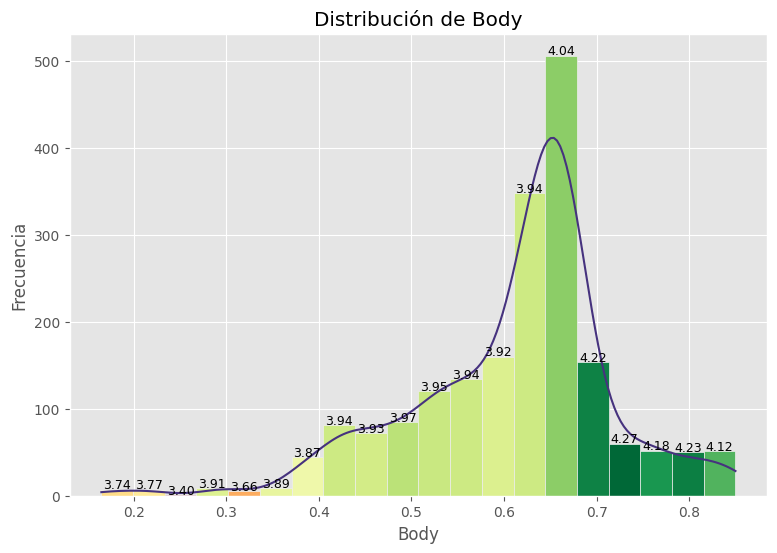

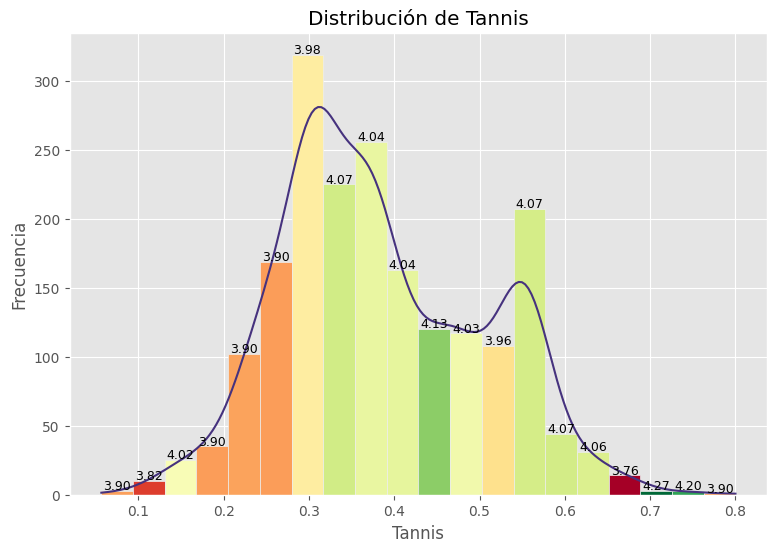

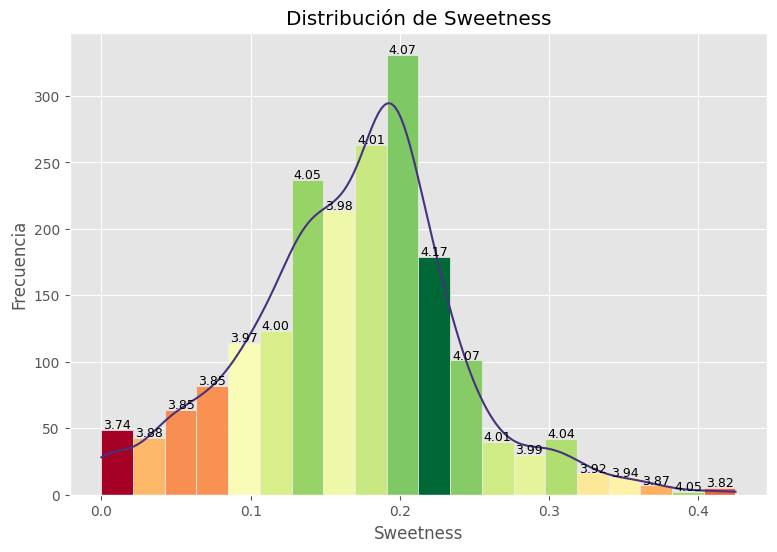

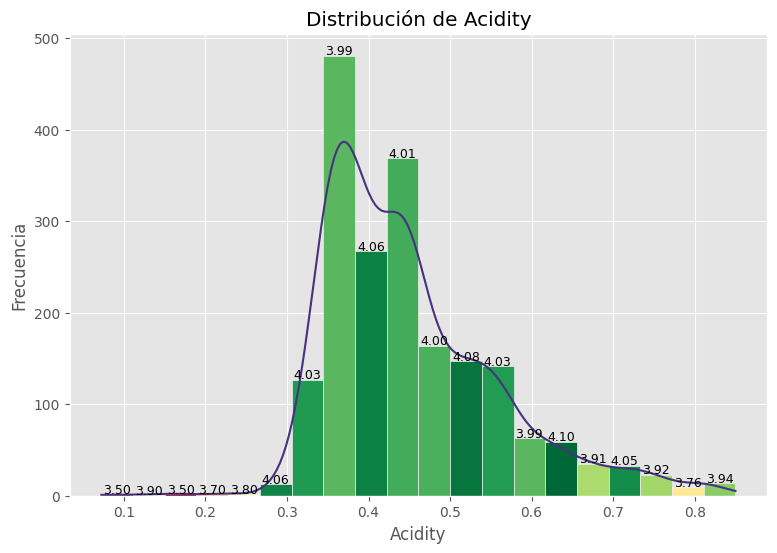

In [18]:
taste_columns = ["body", "tannis", "sweetness", "acidity"]

for column in taste_columns:

    # Crear bins e histograma
    bin_edges = np.histogram_bin_edges(wines[column], bins=20)
    wines[column + "_bin"] = pd.cut(wines[column], bins=bin_edges, include_lowest=True)
    hist = sns.histplot(wines[column], kde=True, bins=20)
    plt.title(f"Distribución de {column.capitalize()}")

    # Calcular la altura de las barras y la media de ratings por bin
    bin_heights = [h.get_height() for h in hist.patches]
    average_ratings = wines.groupby(column + "_bin", observed = False)["rating"].mean()

    # Agregar colores
    norm = Normalize(average_ratings.min(), average_ratings.max())
    cmap = cm.RdYlGn

    # Crear las barras con su label de rating promedio y color acorde
    for i, bar in enumerate(hist.patches):
        avg_rating = average_ratings.iloc[i]
        bar.set_facecolor(cmap(norm(avg_rating)))
        plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i])/2,
                 bin_heights[i] + 1,
                 f"{avg_rating:.2f}",
                 ha="center",
                 fontsize=9)

    plt.xlabel(column.capitalize())
    plt.ylabel("Frecuencia")
    plt.show()

### Alcohol

- ¿Cual es la distribución de alcoholes en nuestros vinos?
- ¿Varía mucho el alcohol que un vino puede tener?
<br>

> El alcohol muestra una distribución con claros picos, levemente multimodal, con una gran concentración en el 14% de alcohol. Los picos en 13.5 y 14.5 seguramente marcan redondeos de los vinos. Por lo que podemos asumir que en general los vinos rondan en el 14% de alcohol, con algunos pocos outliers por debajo del 12% y encima del 15%.

<br>

---

In [19]:
pd.DataFrame(wines[["alcohol"]].describe().T)

,count,mean,std,min,25%,50%,75%,max
alcohol,1955.0,0.138689,0.00607,0.07,0.135,0.1402,0.1415,0.158


<Axes: xlabel='alcohol', ylabel='Count'>

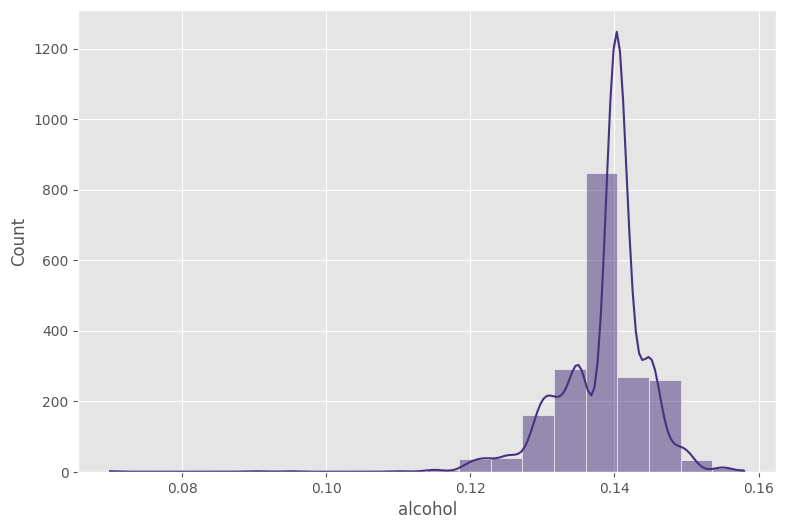

In [20]:
sns.histplot(wines["alcohol"], kde=True, bins=20)

<Axes: xlabel='alcohol', ylabel='Count'>

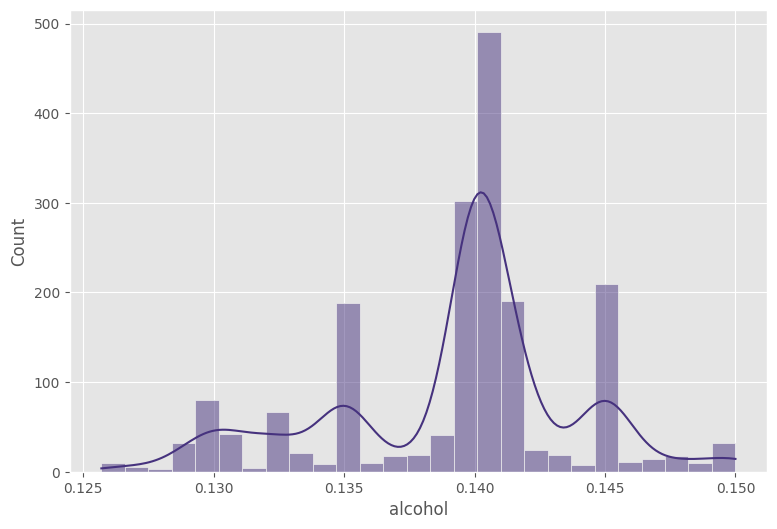

In [21]:
# Distribución del alcohol sin outliers
no_outlier_alcohol = ut.manage_outlier_IQR(df=wines["alcohol"], func="remove")
sns.histplot(no_outlier_alcohol, kde=True)

<br>
<br>
<br>
<br>
<br>
<br>

---

## 02 | Análisis de Variables Categóricas

Esta sección se enfoca en analizar la frecuencia y distribución de variables categóricas para comprender valores habituales y atípicos, densidad de valores y estadísticas descriptivas generales.

In [ ]:
# Columnas categóricas
wines.select_dtypes(include=['object']).columns

# Adicional a tales columnas, constan las columnas year y las de tipo one-hot (grapes, notes, pairings, region)


Index(['wine_link', 'name', 'winery', 'style', 'image', 'Categoria_Precio'], dtype='object')

### Year (Año)

- ¿De qué año tenemos más vinos?

<br>

> La mayor cantidad de vinos provienen de etiquetas 2019 a 2022.

> Hay vinos de 26 años distintos, donde la media (75) de vinos por año está bastante desviada de la mediana (14), con claros años que destacan por la cantidad de vinos que poseen.

<br>

---

In [91]:
# Estadísticas descriptivas de la cantidad de vinos por año
value_count_year = wines["year"].value_counts()
pd.DataFrame(value_count_year.describe()).T.rename(index={"count": "year"}, columns={"count": "count_distinct"})

,count_distinct,mean,std,min,25%,50%,75%,max
year,26.0,75.192308,109.385198,1.0,2.25,14.0,97.25,323.0


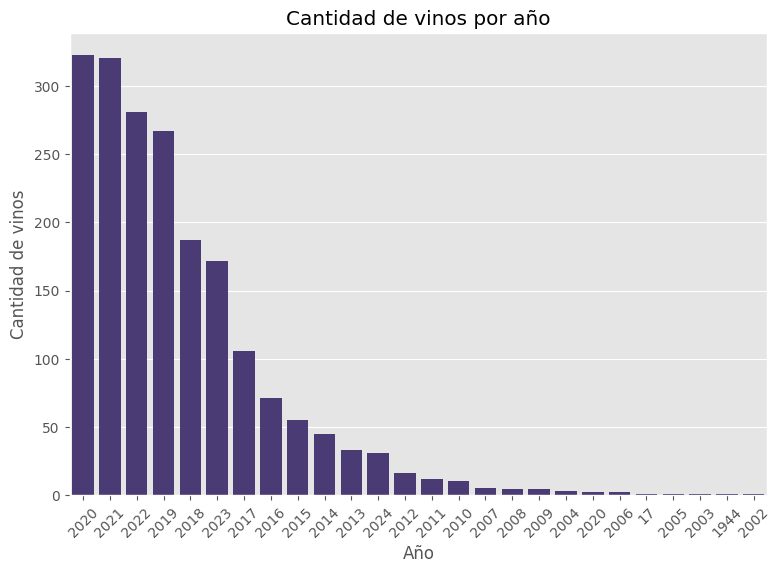

In [90]:
# Distribución de vinos por año
sns.countplot(data=wines, x="year", order=value_count_year.index)
plt.title("Cantidad de vinos por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de vinos")
plt.xticks(rotation=45, ticks=range(len(value_count_year)), labels=[int(label) for label in value_count_year.index])
plt.show()

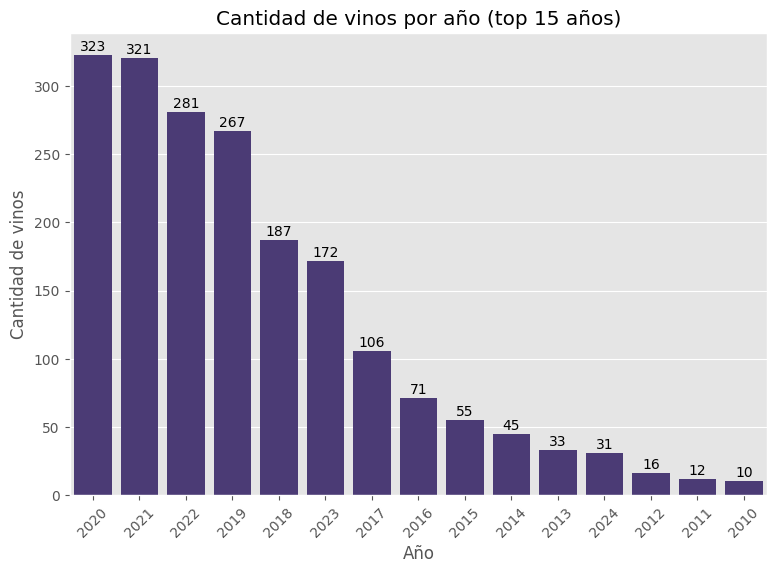

In [88]:
top_15_year_count = wines['year'].value_counts().index[:15]
year_count = sns.countplot(data=wines, x='year', order=top_15_year_count)

year_bar_heights = [bar.get_height() for bar in year_count.patches]

for i, bar in enumerate(year_count.patches):
    label = year_bar_heights[i]
    plt.text(bar.get_x() + bar.get_width() / 2,
             label + 1,
             f"{int(label)}",
             ha="center",
             va="bottom",
             fontsize=10)

plt.title("Cantidad de vinos por año (top 15 años)")
plt.xlabel("Año")
plt.ylabel("Cantidad de vinos")
plt.xticks(
    rotation=45,
    ticks=range(len(year_bar_heights)),
    labels=[int(label) for label in top_15_year_count]
)
plt.show()


### Winery (Bodega)
- ¿Qué bodegas son las más habituales o conocidas entre vinos argentinos?

<br>

> Sobre todo destacan las bodegas Catena Zapata y Zuccardi, dos etiquetas bien conocidas.

> Hay 311 bodegas distintas, pero una gran parte de ellas tiene pocos vinos (<3). Eso dista mucho de la bodega más habitual, con 111 vinos. Esto se ve claramente en la distribución con una fuerte concentración en pocas bodegas y una larga cola.

<br>

---

In [71]:
# Estadísticas descriptivas de la cantiadad de vinos por bodega
wines["winery"] = wines["winery"].replace("Catena", "Catena Zapata")
value_count_winery = wines['winery'].value_counts()
pd.DataFrame(value_count_winery).describe().T.rename(index={"count": "winery"}, columns={"count": "count_distinct"})

,count_distinct,mean,std,min,25%,50%,75%,max
winery,311.0,6.286174,11.519623,1.0,1.0,3.0,7.0,111.0


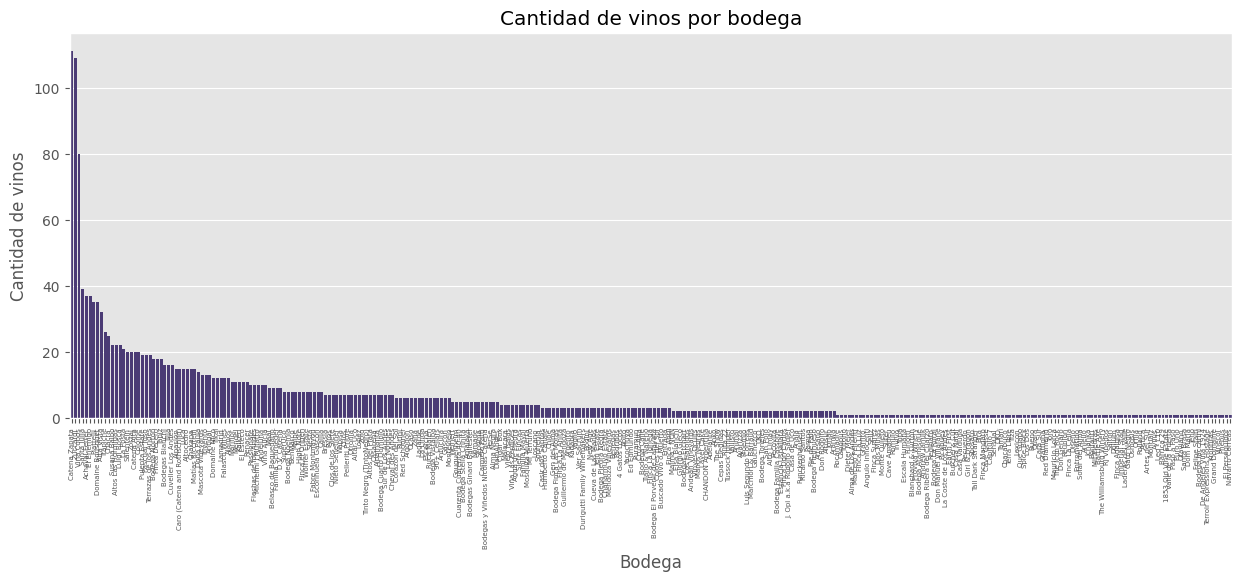

In [101]:
# Distribución de cantidad de vinos por bodega
plt.figure(figsize=(15,5))
sns.countplot(data=wines, x="winery", order=value_count_winery.index)
plt.title("Cantidad de vinos por bodega")
plt.xlabel("Bodega")
plt.ylabel("Cantidad de vinos")
plt.xticks(rotation=90, fontsize=5)
plt.show()

Cantidad de bodegas distintas: 311


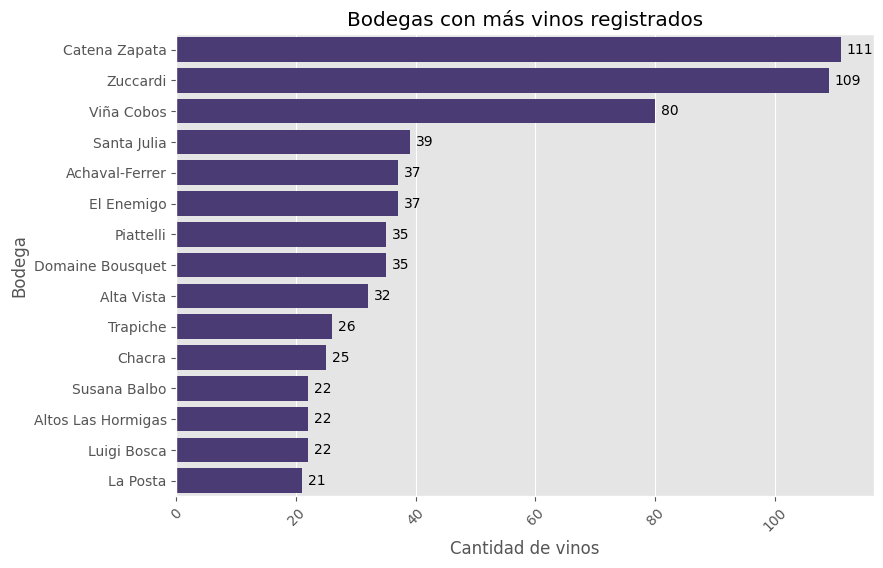

In [ ]:
wines["winery"] = wines["winery"].replace("Catena", "Catena Zapata")
top_15_bodegas = wines['winery'].value_counts().head(15)
winery_bars = sns.barplot(x=top_15_bodegas.values, y=top_15_bodegas.index)

for i, bar in enumerate(winery_bars.patches):
    label = bar.get_width()
    plt.text(label + 1,
             bar.get_y() + bar.get_height() / 2,
             f"{int(label)}",
             ha="left",
             va="center",
             fontsize=10)

plt.title("Bodegas con más vinos registrados")
plt.xlabel("Cantidad de vinos")
plt.ylabel("Bodega")
plt.xticks(rotation=45)
plt.show()


### Wine Style (Estilo de Vino)

---

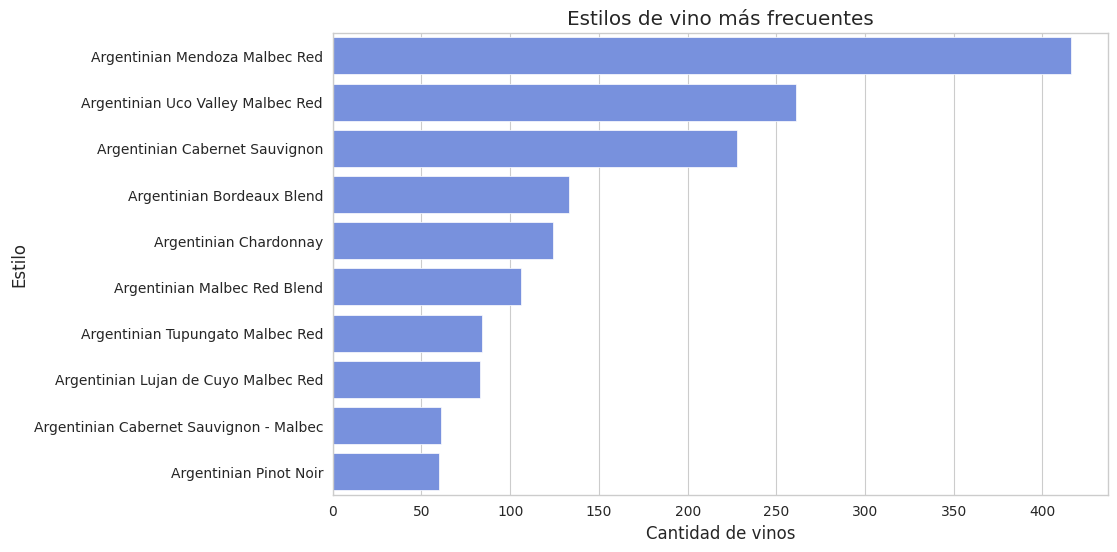

In [ ]:
style_counts = wines['style'].value_counts().head(10)

sns.set_style("whitegrid")
sns.set_palette("coolwarm")

plt.figure(figsize=(10, 6))
sns.barplot(x=style_counts.values, y=style_counts.index)
plt.title("Estilos de vino más frecuentes")
plt.xlabel("Cantidad de vinos")
plt.ylabel("Estilo")
plt.show()


### Notas de Sabor

---

/tmp/ipykernel_3367/1864039787.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=note_means.values, y=note_means.index, palette="viridis")


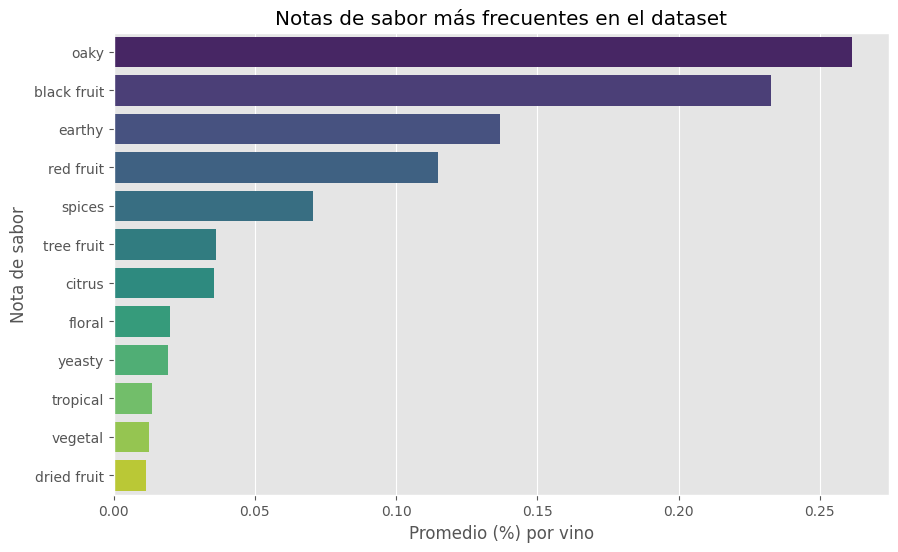

In [ ]:
# Corregir. Si le cambiamos los datos esto puede pasar a estar mal.

notes_cols = [
    'black fruit', 'citrus', 'dried fruit', 'earthy', 'floral', 'oaky',
    'red fruit', 'spices', 'tree fruit', 'tropical', 'vegetal', 'yeasty'
]
note_means = wines[notes_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=note_means.values, y=note_means.index, palette="viridis")
plt.title("Notas de sabor más frecuentes en el dataset")
plt.xlabel("Promedio (%) por vino")
plt.ylabel("Nota de sabor")
plt.show()



### Grapes

---

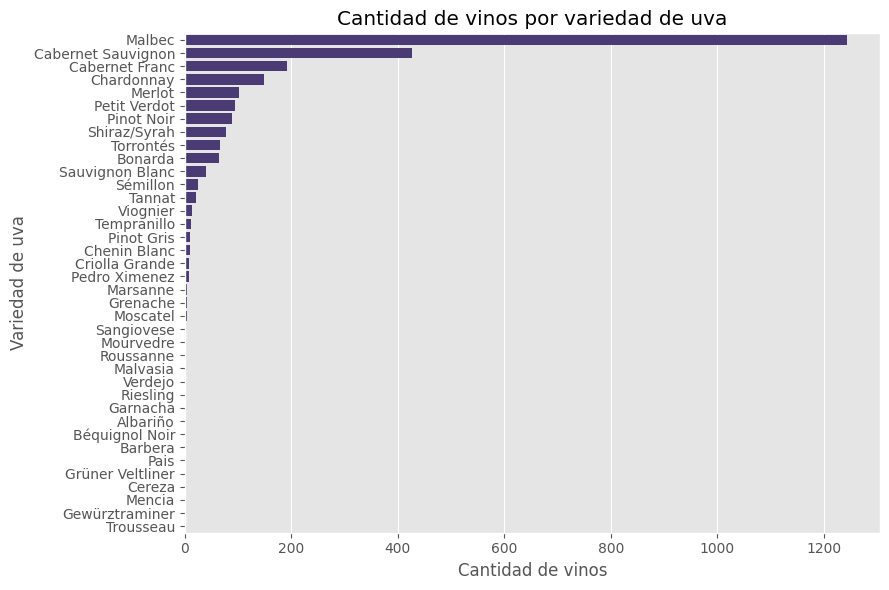

In [ ]:
grape_cols = [
    'Albariño', 'Barbera', 'Bonarda', 'Béquignol Noir', 'Cabernet Franc', 'Cabernet Sauvignon',
    'Cereza', 'Chardonnay', 'Chenin Blanc', 'Criolla Grande', 'Garnacha', 'Gewürztraminer',
    'Grenache', 'Grüner Veltliner', 'Malbec', 'Malvasia', 'Marsanne', 'Mencia', 'Merlot',
    'Moscatel', 'Mourvedre', 'Pais', 'Pedro Ximenez', 'Petit Verdot',
    'Pinot Gris', 'Pinot Noir', 'Riesling', 'Roussanne', 'Sangiovese', 'Sauvignon Blanc',
    'Shiraz/Syrah', 'Sémillon', 'Tannat', 'Tempranillo', 'Torrontés', 'Trousseau',
    'Verdejo', 'Viognier'
]
grape_counts = wines[grape_cols].sum().sort_values(ascending=False)
sns.barplot(x=grape_counts.values, y=grape_counts.index)
plt.title("Cantidad de vinos por variedad de uva")
plt.xlabel("Cantidad de vinos")
plt.ylabel("Variedad de uva")
plt.tight_layout()
plt.show()


### Maridajes

---

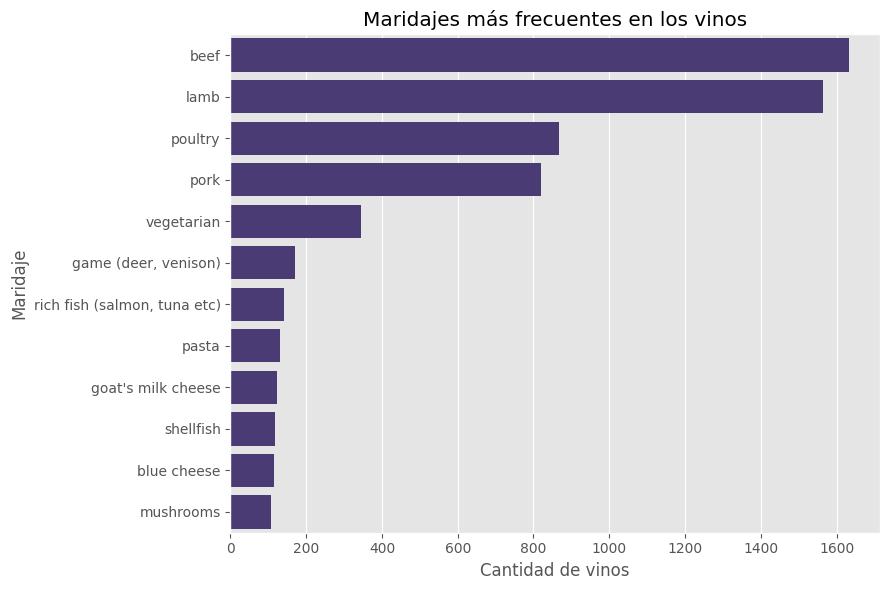

In [ ]:
pairing_cols = [
    'any junk food will do', 'aperitif', 'appetizers and snacks', 'beef', 'blue cheese',
    'cured meat', 'game (deer, venison)', "goat's milk cheese", 'lamb', 'lean fish',
    'mature and hard cheese', 'mild and soft cheese', 'mushrooms', 'pasta', 'pork',
    'poultry', 'rich fish (salmon, tuna etc)', 'shellfish', 'spicy food', 'veal', 'vegetarian'
]

pairing_freq = wines_filtrados[pairing_cols].sum().sort_values(ascending=False)

top_pairing = pairing_freq.head(12)

sns.barplot(x=top_pairing.values, y=top_pairing.index)
plt.title("Maridajes más frecuentes en los vinos")
plt.xlabel("Cantidad de vinos")
plt.ylabel("Maridaje")
plt.tight_layout()
plt.show()


### Regions (Regiones)

---

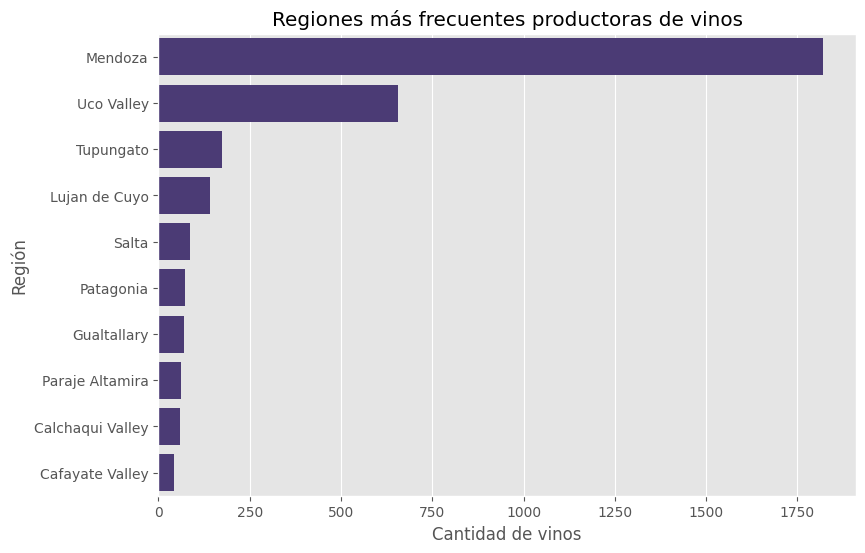

In [ ]:
region_cols = [
    'Cafayate Valley', 'Calchaqui Valley', 'Campanha',
    'Famatina', 'Gualtallary', 'La Consulta', 'La Rioja', 'Las Compuertas',
    'Lujan de Cuyo', 'Lunlunta', 'Maipu', 'Mendoza', 'Paraje Altamira',
    'Patagonia', 'Pedernal Valley', 'Perdriel', 'Rio Grande do Sul', 'Rio Negro',
    'Salta', 'San Carlos', 'San Juan', 'San Rafael', 'Serra Gaúcha',
    'Tulum Valley', 'Tunuyán', 'Tupungato', 'Uco Valley', 'Vale dos Vinhedos',
    'Vista Flores'
]

regiones_melted = wines.melt(
    value_vars=region_cols,
    var_name='region',
    value_name='is_region'
)

regiones_validas = regiones_melted[regiones_melted['is_region'] == 1]
conteo_regiones = regiones_validas['region'].value_counts().head(10)

sns.barplot(x=conteo_regiones.values, y=conteo_regiones.index)
plt.title("Regiones más frecuentes productoras de vinos")
plt.xlabel("Cantidad de vinos")
plt.ylabel("Región")
plt.show()



<br>
<br>
<br>
<br>
<br>

---

## 03 | Cruce de Variables

Esta sección se enfoca en el cruce de dos o tres variables, tanto categóricas como numéricas, para ver frecuencias combinadas y las características de ciertas variables más frecuentes.

### Rating + Rating Quantity

---

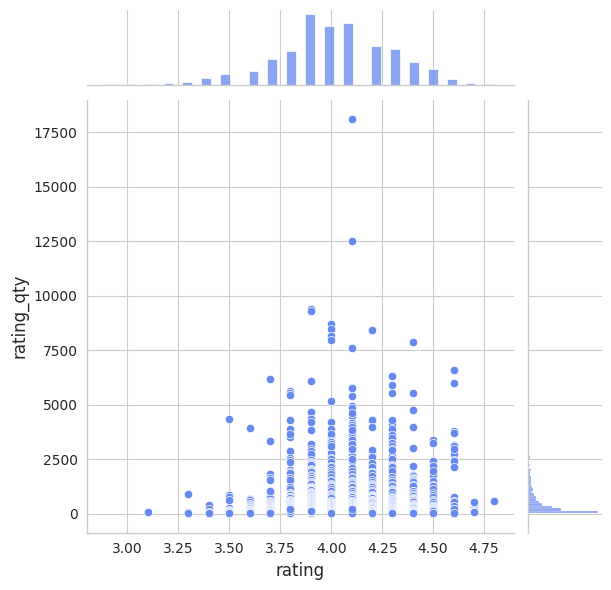

In [ ]:
sns.jointplot(data=wines, x="rating", y="rating_qty")

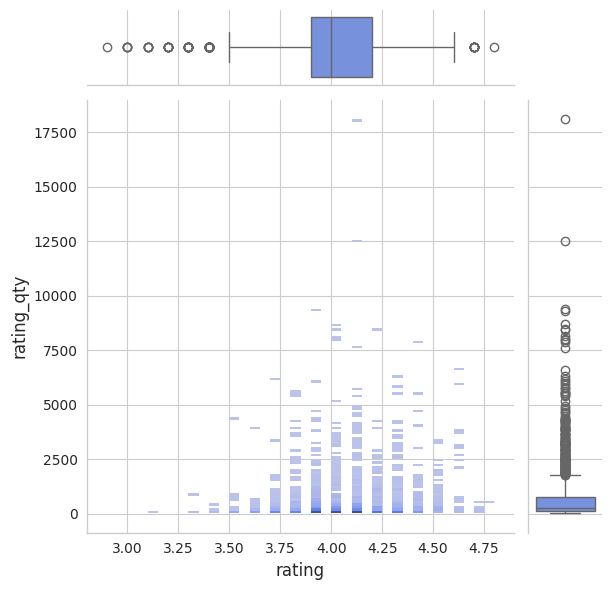

In [ ]:
g = sns.JointGrid(data=wines, x="rating", y="rating_qty")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

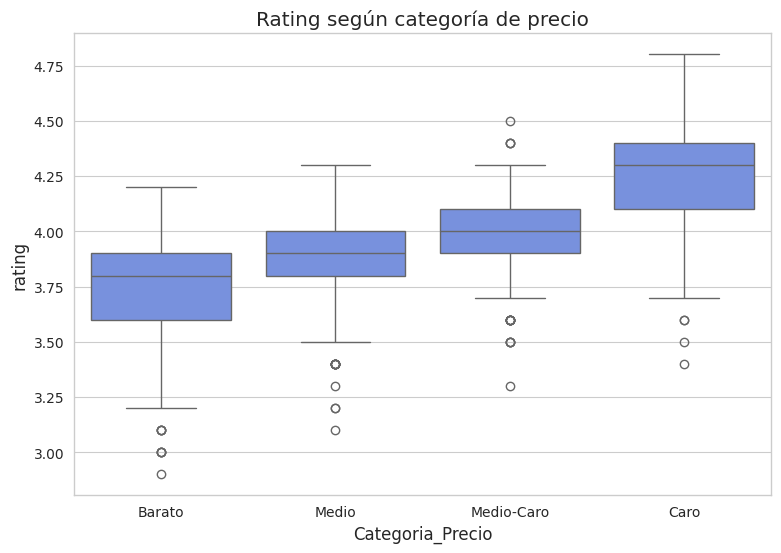

Categoria_Precio
Barato         3.753828
Caro           4.265191
Desconocido    3.988235
Medio          3.896600
Medio-Caro     4.021277
Name: rating, dtype: float64

In [ ]:

sns.boxplot(data=wines, x='Categoria_Precio', y='rating', order=categorias_precio)
plt.title("Rating según categoría de precio")
plt.show()

wines.groupby('Categoria_Precio')['rating'].mean()


### Rating + Alcohol

> Se denota una leve tendencia positiva entre el % de alcohol y el rating.

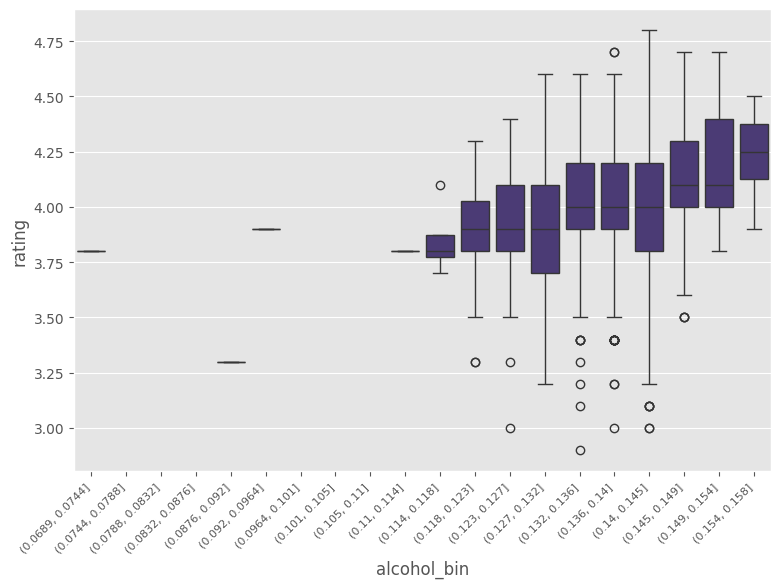

In [ ]:
wines["alcohol_bin"] = pd.cut(wines["alcohol"], bins=20, include_lowest=True)
sns.boxplot(data=wines, x="alcohol_bin", y="rating")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.show()

### Regiones + Rating

---

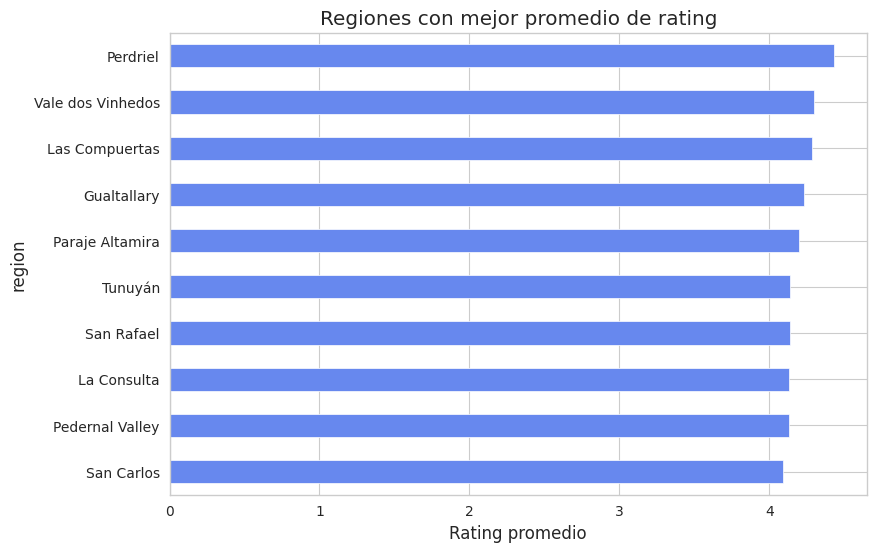

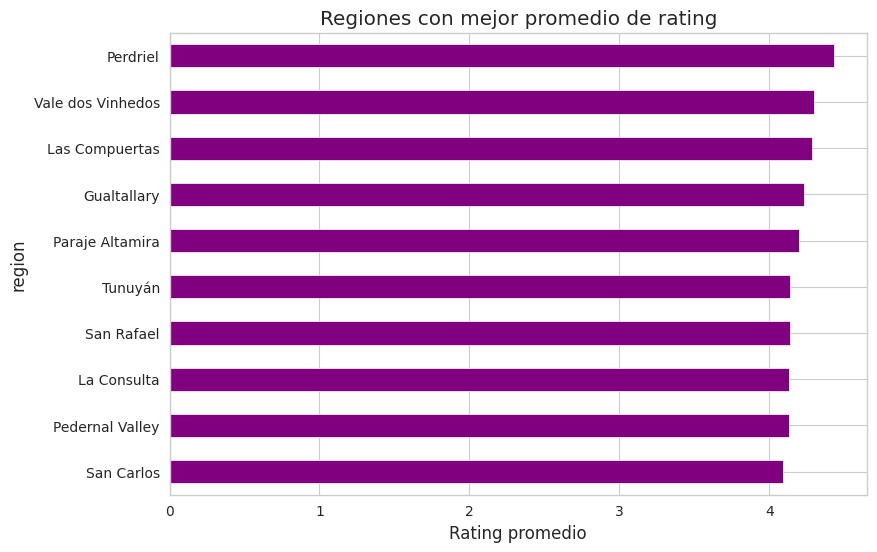

In [ ]:
wines_filtrados_reset = wines_filtrados.reset_index().copy()

regiones_melted = wines_filtrados_reset.melt(
    id_vars=['index', 'rating'], 
    value_vars=region_cols,
    var_name='region',
    value_name='is_region'
)

regiones_validas = regiones_melted[regiones_melted['is_region'] == 1]
region_rating = regiones_validas.groupby('region')['rating'].mean().sort_values(ascending=False).head(10)

region_rating.plot(kind='barh')
plt.title("Regiones con mejor promedio de rating")
plt.xlabel("Rating promedio")
plt.gca().invert_yaxis()
plt.show()

region_rating.plot(kind='barh', color='purple')
plt.title("Regiones con mejor promedio de rating")
plt.xlabel("Rating promedio")
plt.gca().invert_yaxis()
plt.show()




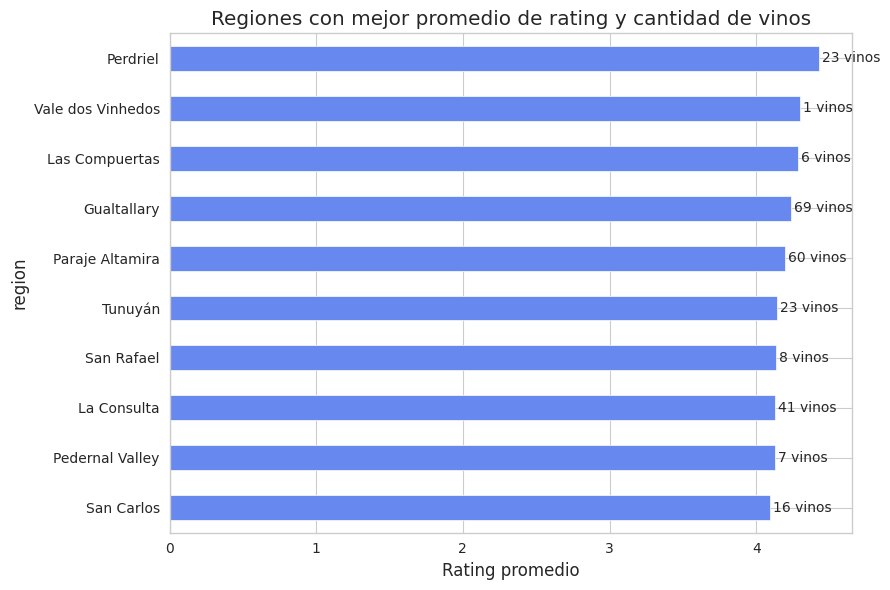

In [ ]:
region_rating = regiones_validas.groupby('region')['rating'].mean()

region_counts = regiones_validas['region'].value_counts()

region_stats = pd.DataFrame({
    'rating_promedio': region_rating,
    'cantidad_vinos': region_counts
}).dropna().sort_values(by='rating_promedio', ascending=False).head(10)

ax = region_stats['rating_promedio'].plot(kind='barh',)
plt.title("Regiones con mejor promedio de rating y cantidad de vinos")
plt.xlabel("Rating promedio")
plt.gca().invert_yaxis()

for i, (rating, cantidad) in enumerate(zip(region_stats['rating_promedio'], region_stats['cantidad_vinos'])):
    plt.text(rating + 0.02, i, f"{int(cantidad)} vinos", va='center')

plt.tight_layout()
plt.show()


### Winery + Rating

---

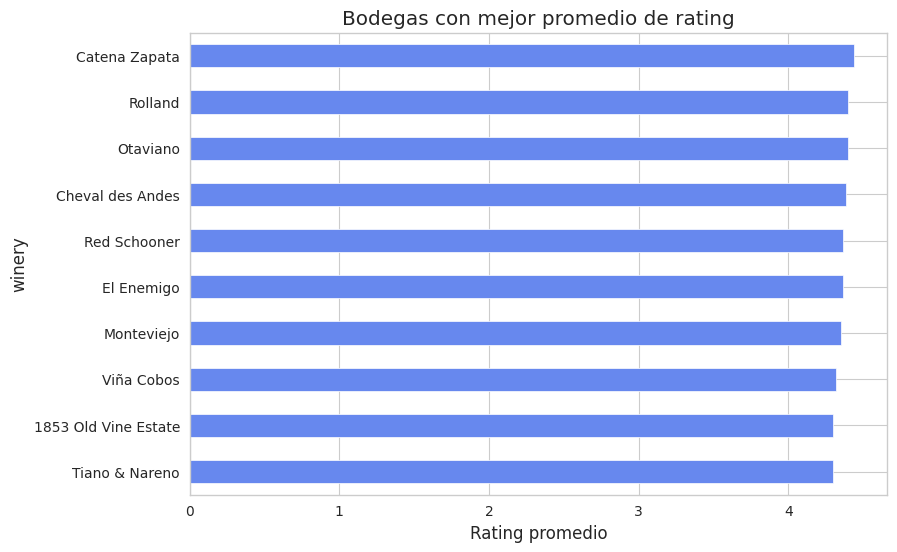

In [ ]:
bodega_rating = wines_filtrados.groupby('winery')['rating'].mean().sort_values(ascending=False).head(10)
bodega_rating.plot(kind='barh')
plt.title("Bodegas con mejor promedio de rating")
plt.xlabel("Rating promedio")
plt.gca().invert_yaxis()
plt.show()


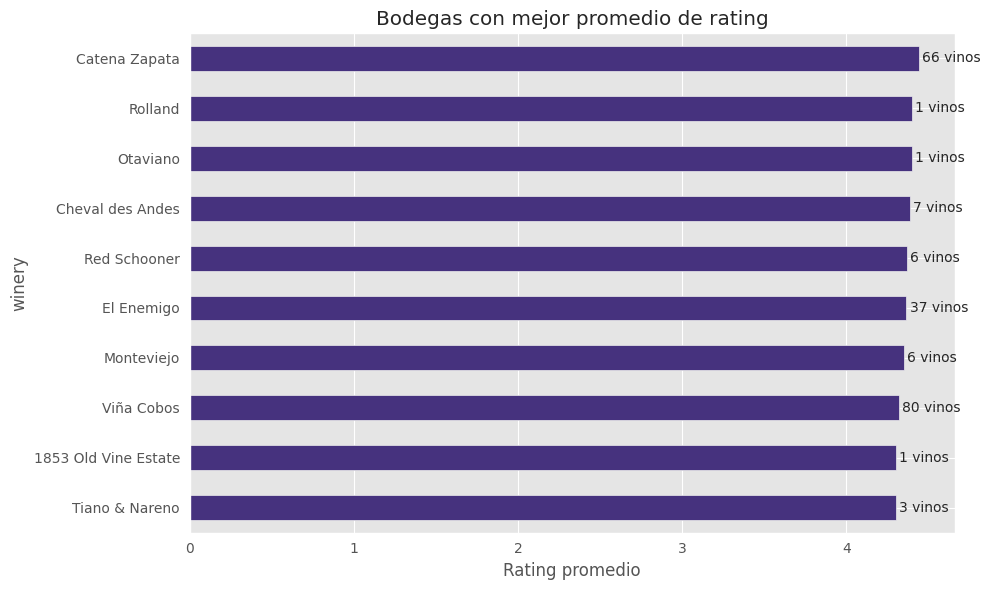

In [ ]:
plt.style.use("ggplot")
sns.set_palette("viridis")
plt.rcParams["figure.figsize"] = (10,6)

bodega_rating = wines_filtrados.groupby('winery')['rating'].mean()
bodega_top10 = bodega_rating.sort_values(ascending=False).head(10)

bodega_counts = wines_filtrados['winery'].value_counts()
bodega_counts_top10 = bodega_counts[bodega_top10.index]


ax = bodega_top10.plot(kind='barh')
plt.title("Bodegas con mejor promedio de rating")
plt.xlabel("Rating promedio")
plt.gca().invert_yaxis()


for i, (rating, cantidad) in enumerate(zip(bodega_top10, bodega_counts_top10)):
    plt.text(rating + 0.02, i, f"{int(cantidad)} vinos", va='center')

plt.tight_layout()
plt.show()


In [ ]:
top_vinos = wines_filtrados.sort_values(by='rating', ascending=False).head(50)
top_vinos[['name', 'rating', 'price', 'winery']].head(10)


,name,rating,price,winery
0,Paraiso,4.8,188.33,Luigi Bosca
1145,Cobos Volturno,4.7,399.99,Viña Cobos
6,Adrianna Vineyard Mundus Bacillus Terrae Malbec,4.7,367.49,Catena Zapata
7,Cobos Viña Cobos Malbec,4.7,599.99,Viña Cobos
9,Cobos Volturno,4.7,349.99,Viña Cobos
5,La Violeta,4.7,125.00,Monteviejo
1,Estiba Reservada,4.7,675.00,Catena Zapata
3,La Violeta,4.7,150.00,Monteviejo
4,Cobos Volturno,4.7,399.99,Viña Cobos
8,Cobos Volturno,4.7,251.99,Viña Cobos


### Style + Rating

---

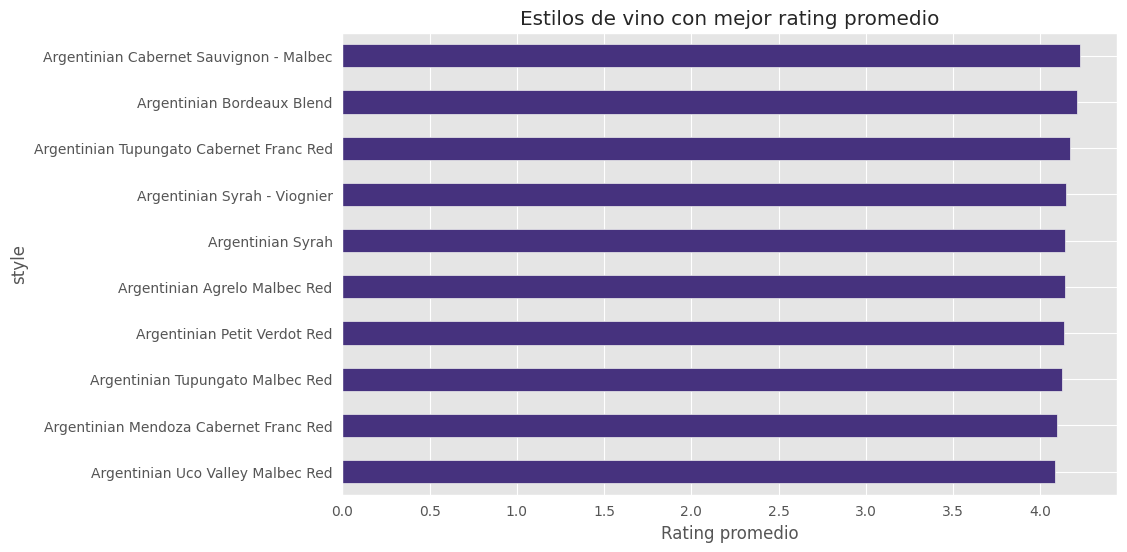

In [ ]:
wines_filtrados_style = wines.dropna(subset=['style', 'rating'])
style_rating = wines_filtrados_style.groupby('style')['rating'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 6))
style_rating.plot(kind='barh')
plt.title("Estilos de vino con mejor rating promedio")
plt.xlabel("Rating promedio")
plt.gca().invert_yaxis()
plt.show()
